In [255]:
! pip install dabl


In [256]:
import warnings  # helps to remove warnings 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import dabl as db


warnings.filterwarnings('ignore')  # setting no warnings inside the notebook 



In [257]:
url = "C:\\Users\\gouthaman\\Desktop\\WildBlueberryPollinationSimulationData.csv"

df = pd.read_csv(url)
df1 = df.copy()

## EDA

In [258]:
df.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [259]:
df.drop(columns="Row#",inplace=True)

In [260]:
df.sample(5)

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
402,12.5,0.25,0.38,0.38,0.75,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.500558,0.424902,35.140899,6033.778564
424,12.5,0.25,0.38,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.522435,0.457946,37.033298,5954.513153
727,25.0,0.50,0.38,0.50,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.476202,0.419216,34.092917,5544.621725
331,12.5,0.25,0.25,0.75,0.63,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.586603,0.488569,40.638496,7428.834423
159,12.5,0.25,0.25,0.38,0.38,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.536209,0.463502,37.625713,6299.226358


In [261]:
df.isnull().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [262]:
df.duplicated().any()

False

### Univariate Analysis 


#### Ploting the distribution of each variable

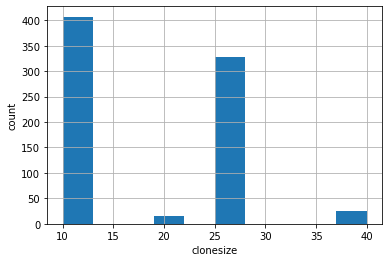

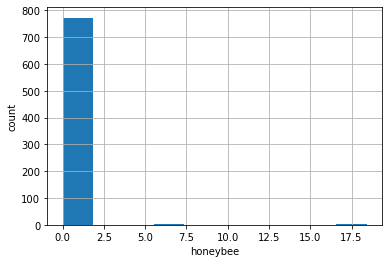

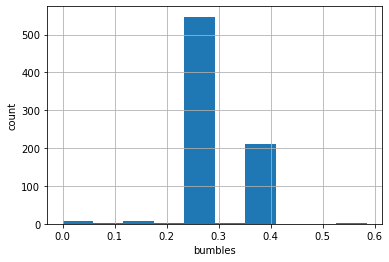

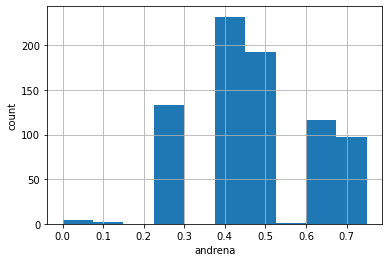

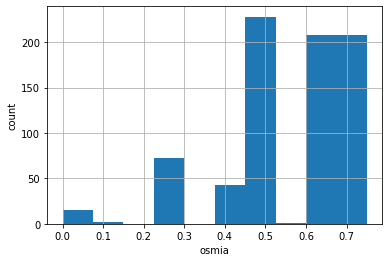

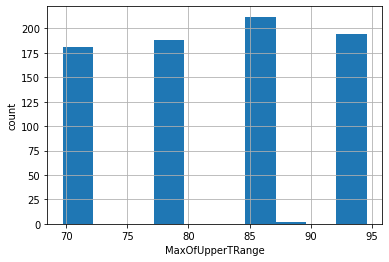

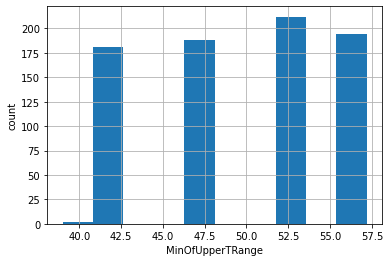

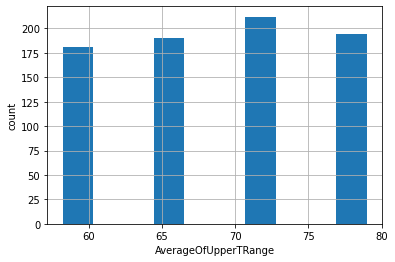

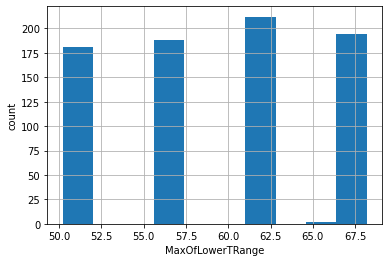

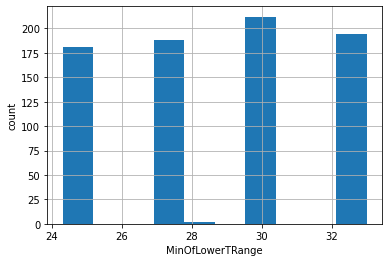

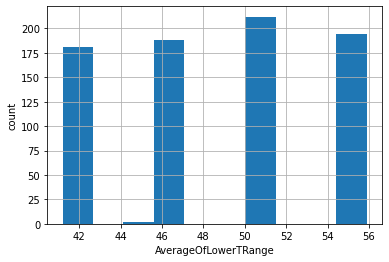

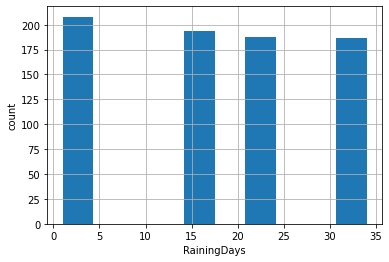

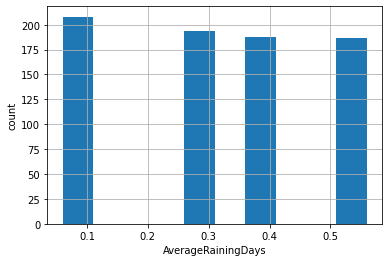

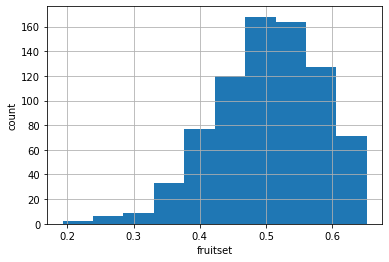

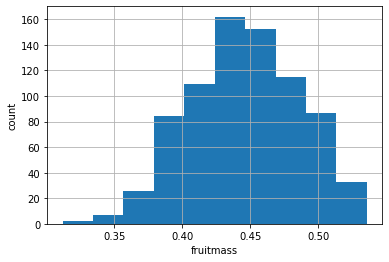

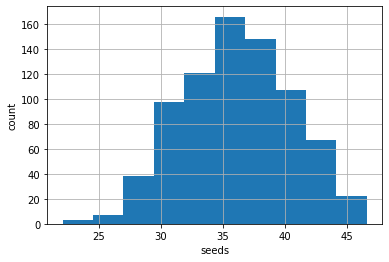

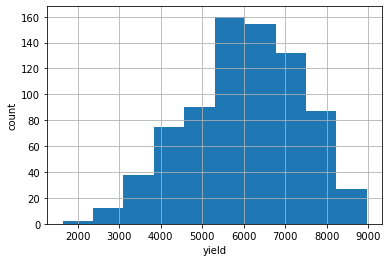

In [263]:
for i in df.columns:
    df[i].hist()
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()

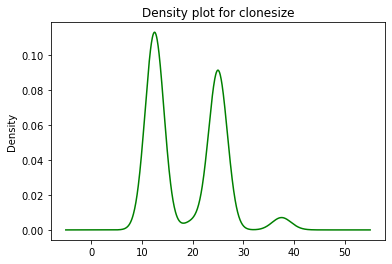

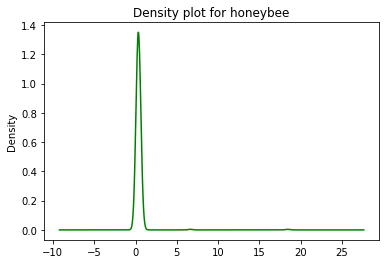

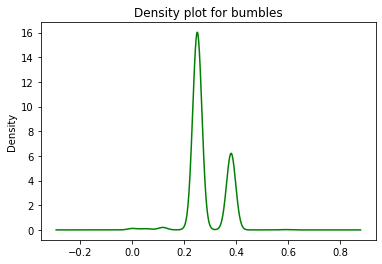

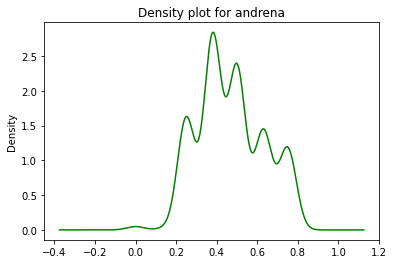

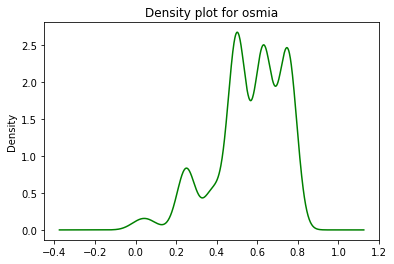

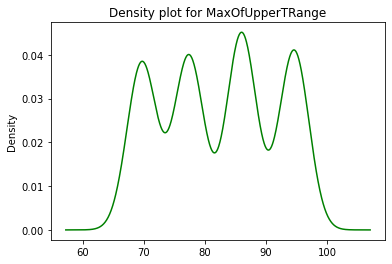

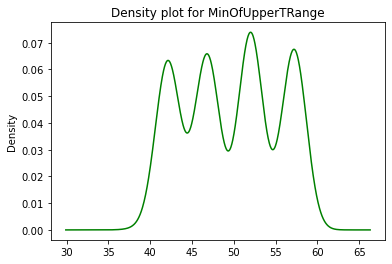

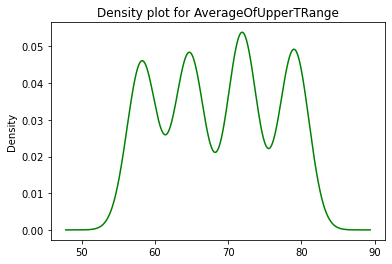

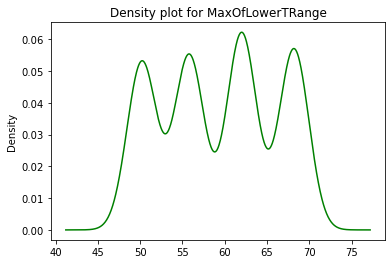

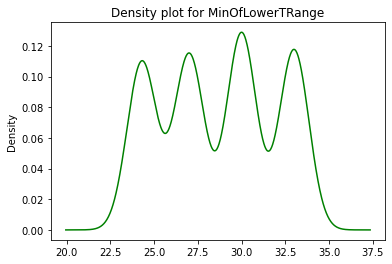

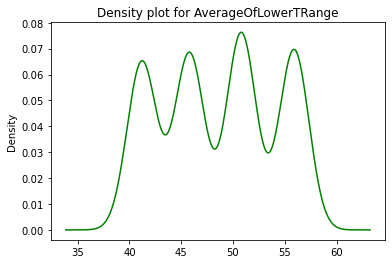

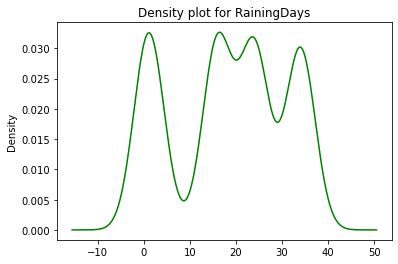

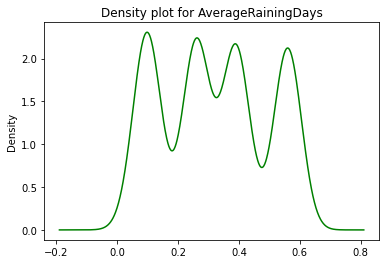

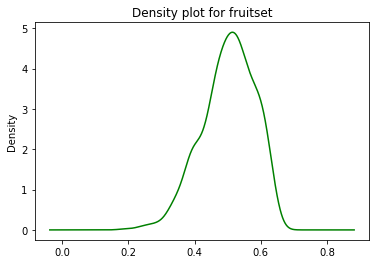

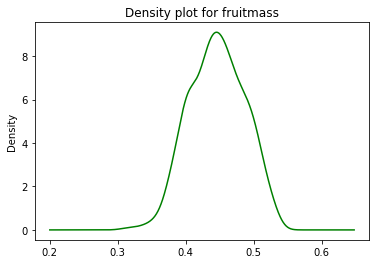

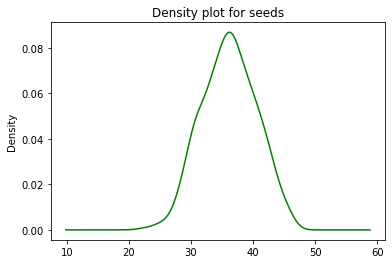

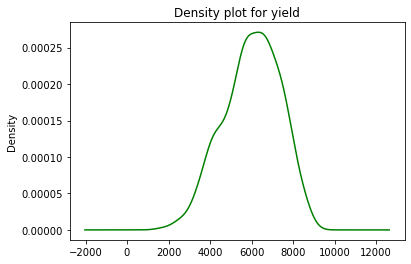

In [264]:
for i in df.columns:
    df[i].plot.density(color='green')
    plt.title('Density plot for {}'.format(i))
    plt.show()

##### Observation:

    Fruitset, fruitmass and Seeds are normally distibuted.
    Target variable yield is also normally distibuted

    
    

Lets use Box plot to find if there are any outliers

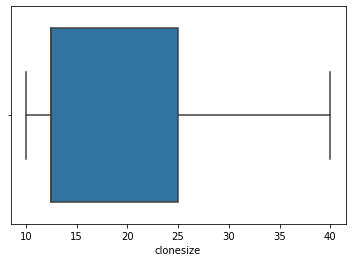

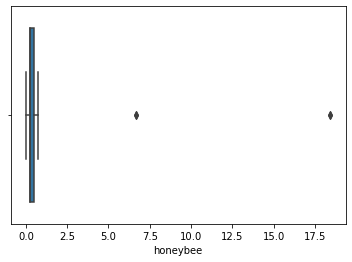

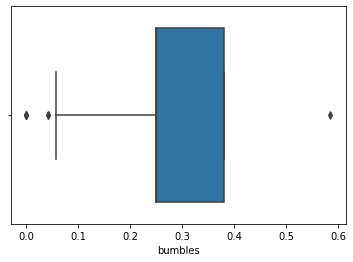

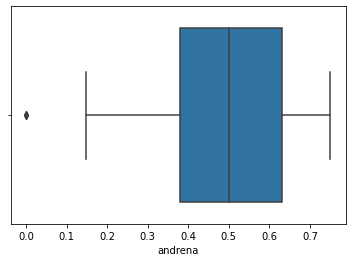

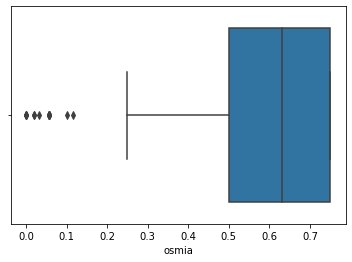

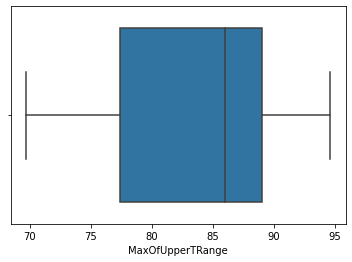

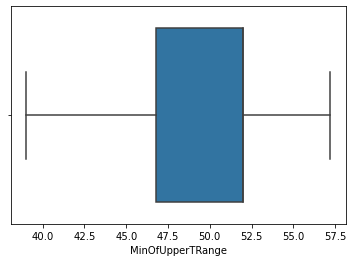

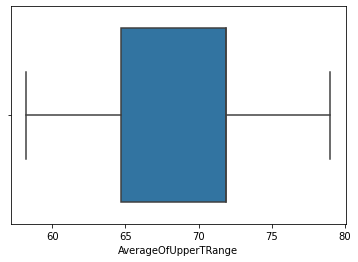

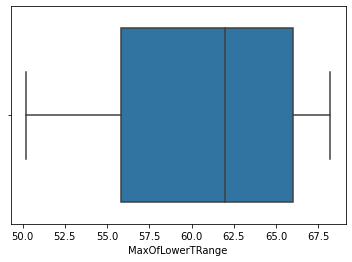

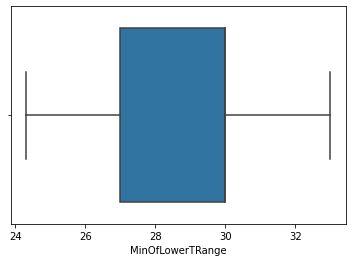

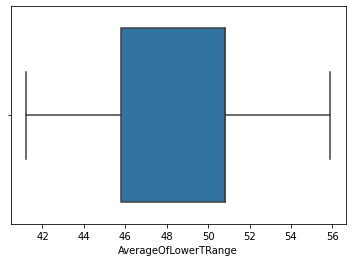

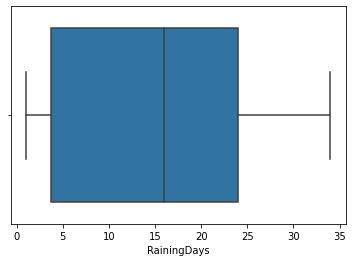

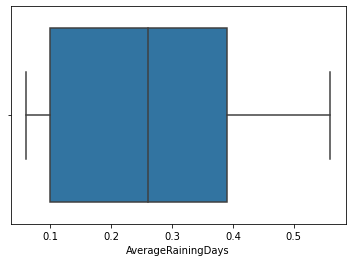

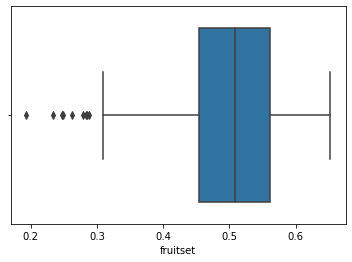

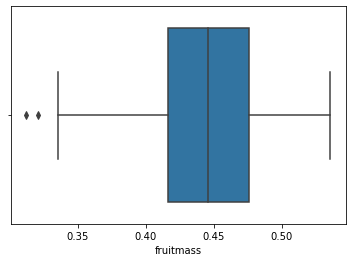

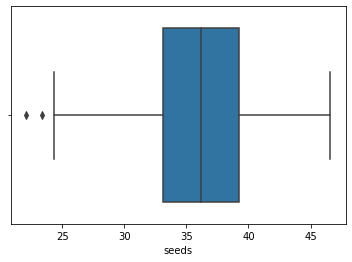

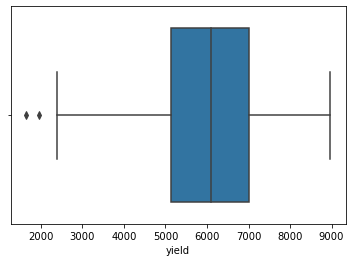

In [265]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

##### Outliers present in  Honeybee, Bumbles,Andrena,Osmia, fruitset,fruitmass,seeds have outliers

### Multivariate Analysis 

Plotting predictors against target "yield"

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=2.38E+04'}, xlabel='fruitset', ylabel='yield'>,
         <AxesSubplot:title={'center':'F=9.42E+03'}, xlabel='seeds'>,
         <AxesSubplot:title={'center':'F=4.99E+03'}, xlabel='fruitmass'>,
         <AxesSubplot:title={'center':'F=3.21E+02'}, xlabel='AverageRainingDays'>],
        [<AxesSubplot:title={'center':'F=3.19E+02'}, xlabel='RainingDays', ylabel='yield'>,
         <AxesSubplot:title={'center':'F=2.82E+02'}, xlabel='clonesize'>,
         <AxesSubplot:title={'center':'F=1.32E+02'}, xlabel='osmia'>,
         <AxesSubplot:title={'center':'F=8.20E+01'}, xlabel='bumbles'>],
        [<AxesSubplot:title={'center':'F=2.82E+01'}, xlabel='MaxOfLowerTRange', ylabel='yield'>,
         <AxesSubplot:title={'center':'F=2.81E+01'}, xlabel='MaxOfUpperTRange'>,
         <AxesSubplot:title={'center':'F=2.70E+01'}, xlabel='MinOfLowerTRange'>,
         <AxesSubplot:title={'center':'F=2.65E+01'}, xlabel='AverageOfUpperTRange'>],
        [<AxesSubplot:title={

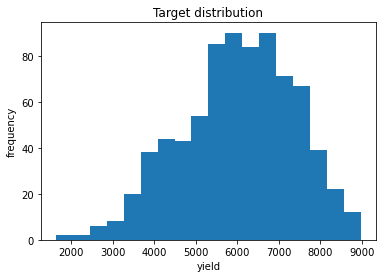

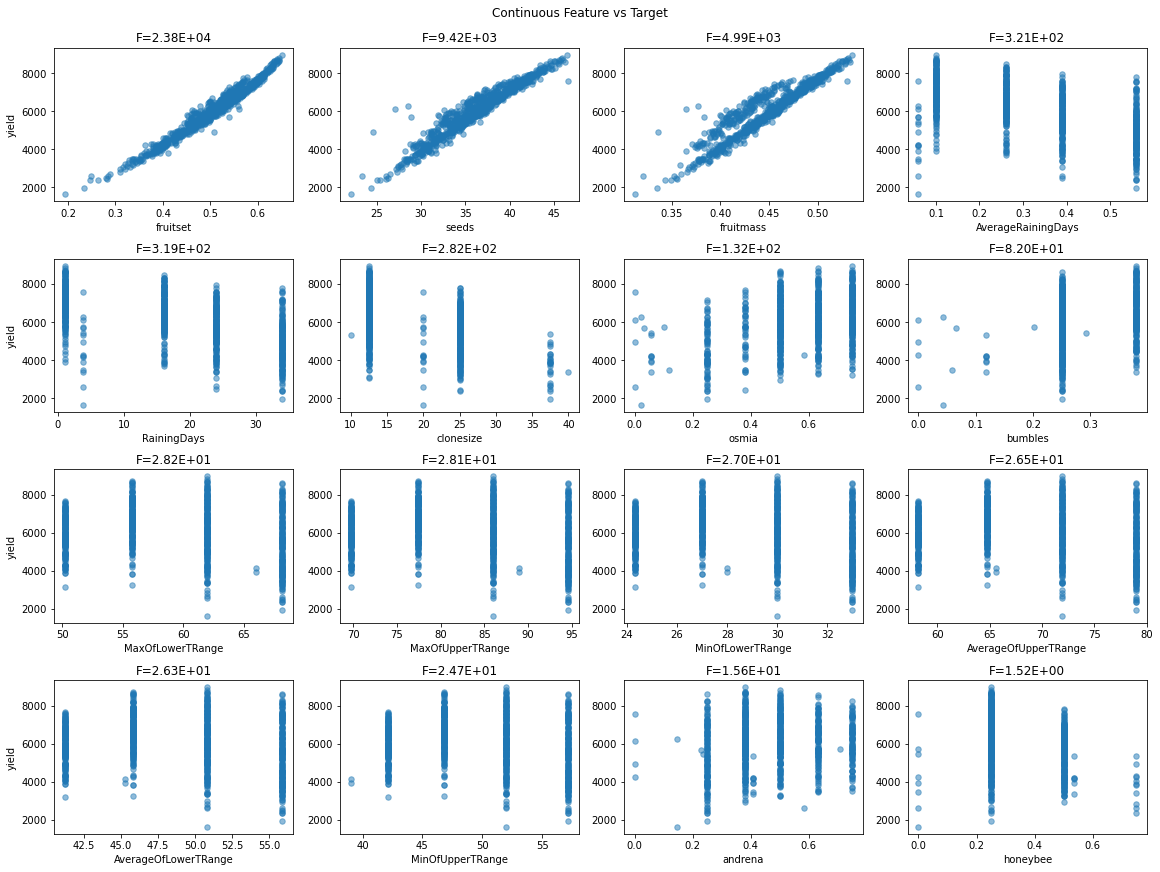

In [266]:
db.plot(df,'yield')

In [267]:
#correlation plot
correlation_matrix = df.corr()
df1 =correlation_matrix.loc[:,["yield"]] 
df1.sort_values(by="yield")

,yield
AverageRainingDays,-0.541215
RainingDays,-0.540069
clonesize,-0.516737
MaxOfLowerTRange,-0.187439
MaxOfUpperTRange,-0.187075
MinOfLowerTRange,-0.183339
AverageOfUpperTRange,-0.181774
AverageOfLowerTRange,-0.181293
MinOfUpperTRange,-0.175883
honeybee,-0.044250


#### Observation:
  
Highly correlated variables with Yield 
    
    AverageRainingDays	-0.541215
    RainingDays	-0.540069
    clonesize	-0.516737
    
    fruitmass	0.930365
    seeds	0.961249
    fruitset	0.984081
    

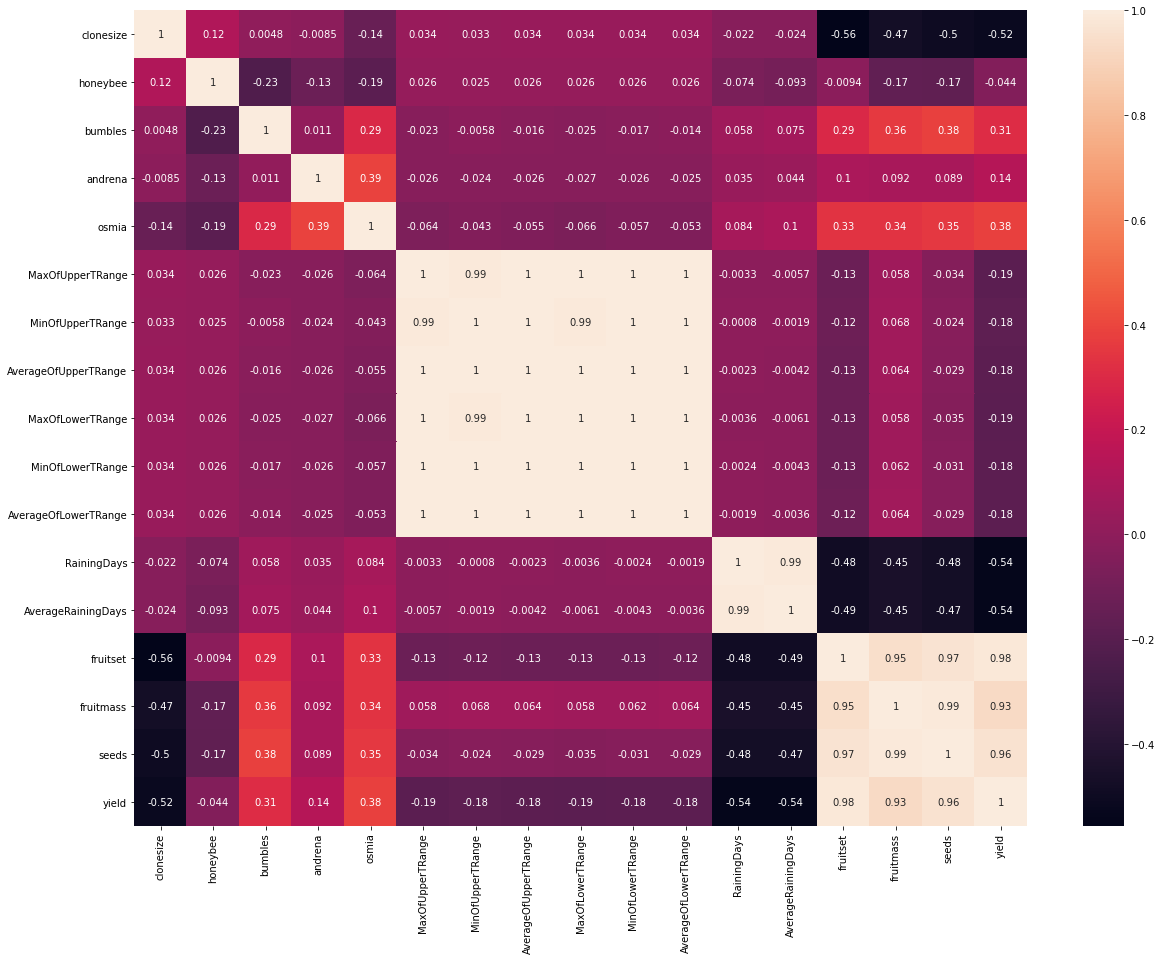

In [268]:
plt.figure(figsize=(20,15))


sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

### Preprocessing Step

###  No Missing values

### Treating Outliers

In [269]:
def outlier_treatment(df,ft):
    q1 = df[ft].quantile(0.25)
    q2 = df[ft].quantile(0.5)
    q3 =df[ft].quantile(0.75)
    iqr = q3 -q1
  
    lower = q1-1.5*iqr
    upper = q3+1.5*iqr

    ls = df.index[(df[ft]<lower)|(df[ft]>upper)]

    return ls

In [270]:
index_list=[]
for i in df.columns:
    index_list.extend(outlier_treatment(df,i))
list(set(index_list))
df.drop(index=index_list,inplace=True)

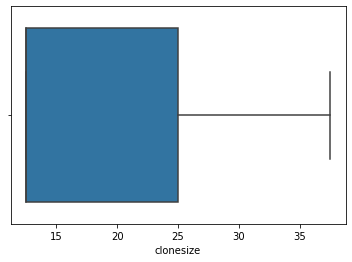

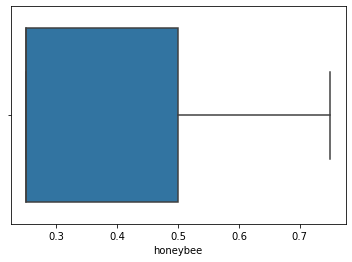

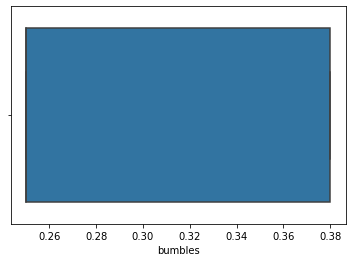

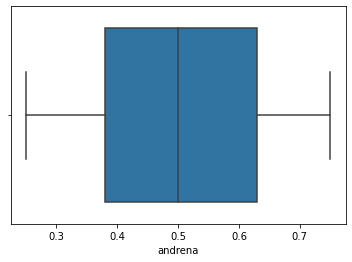

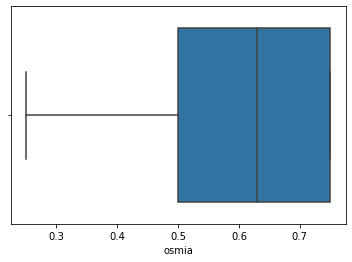

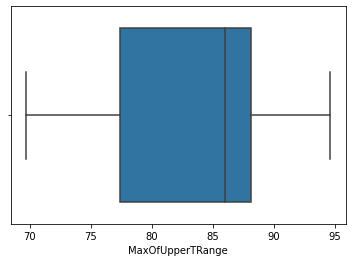

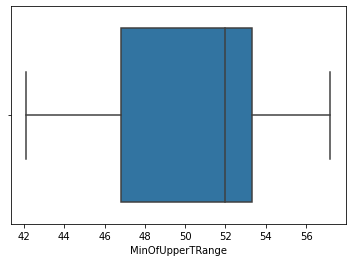

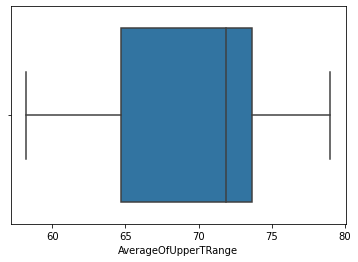

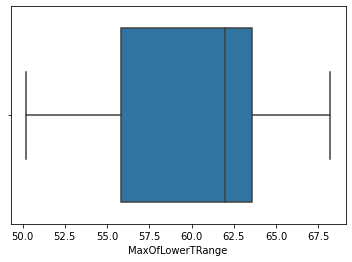

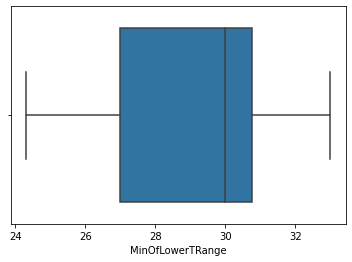

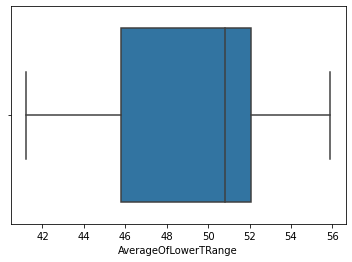

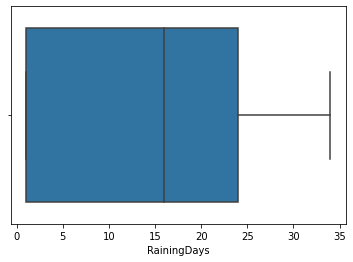

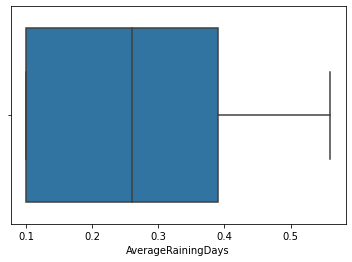

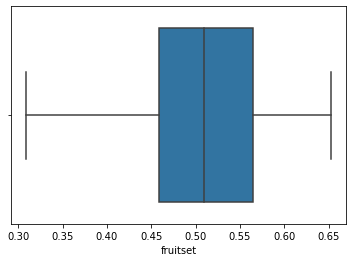

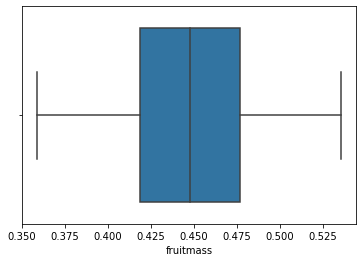

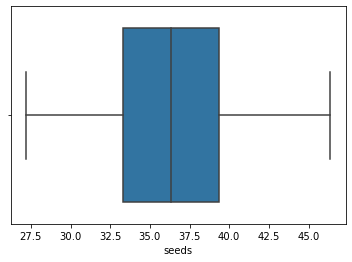

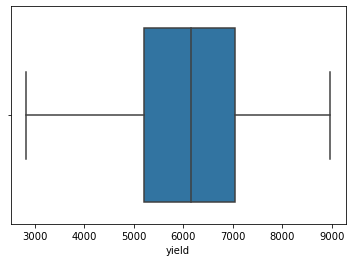

In [271]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

### Checking for skew

In [272]:
df.skew() #no big value of Skew

clonesize               0.531958
honeybee                0.559645
bumbles                 0.971352
andrena                 0.286360
osmia                  -0.634856
MaxOfUpperTRange        0.031375
MinOfUpperTRange        0.026618
AverageOfUpperTRange    0.019517
MaxOfLowerTRange        0.026965
MinOfLowerTRange        0.028770
AverageOfLowerTRange    0.028629
RainingDays            -0.242132
AverageRainingDays      0.073528
fruitset               -0.318618
fruitmass               0.035709
seeds                   0.070036
yield                  -0.215594
dtype: float64

Splitting into predictors and target

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [231]:

X = df[df.columns.difference(["yield"])]
y=df["yield"]

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=123)


In [236]:

scaler= RobustScaler().fit(X_train)


In [252]:
X_tnscaled = pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)
X_tstscaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)


,AverageOfLowerTRange,AverageOfUpperTRange,AverageRainingDays,MaxOfLowerTRange,MaxOfUpperTRange,MinOfLowerTRange,MinOfUpperTRange,RainingDays,andrena,bumbles,clonesize,fruitmass,fruitset,honeybee,osmia,seeds
107,45.8,64.7,0.26,55.8,77.4,27.0,46.8,16.0,0.25,0.25,12.5,0.495006,0.595948,0.25,0.63,41.357386
634,50.8,71.9,0.10,62.0,86.0,30.0,52.0,1.0,0.75,0.25,25.0,0.469978,0.539253,0.50,0.75,38.480352
280,50.8,71.9,0.56,62.0,86.0,30.0,52.0,34.0,0.63,0.25,12.5,0.438631,0.483249,0.25,0.63,34.899957
356,50.8,71.9,0.10,62.0,86.0,30.0,52.0,1.0,0.38,0.38,12.5,0.528322,0.641480,0.25,0.50,45.478381
108,45.8,64.7,0.10,55.8,77.4,27.0,46.8,1.0,0.25,0.25,12.5,0.513261,0.622623,0.25,0.63,43.550164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,55.9,79.0,0.39,68.2,94.6,33.0,57.2,24.0,0.25,0.25,12.5,0.420094,0.443712,0.25,0.63,32.888402
329,55.9,79.0,0.39,68.2,94.6,33.0,57.2,24.0,0.75,0.25,12.5,0.433408,0.476054,0.25,0.63,34.338492
389,55.9,79.0,0.26,68.2,94.6,33.0,57.2,16.0,0.38,0.38,12.5,0.514790,0.623063,0.25,0.75,43.749807
372,50.8,71.9,0.10,62.0,86.0,30.0,52.0,1.0,0.38,0.38,12.5,0.532223,0.645641,0.25,0.63,45.952989


In [274]:
X_tnscaled.sample(5)

,AverageOfLowerTRange,AverageOfUpperTRange,AverageRainingDays,MaxOfLowerTRange,MaxOfUpperTRange,MinOfLowerTRange,MinOfUpperTRange,RainingDays,andrena,bumbles,clonesize,fruitmass,fruitset,honeybee,osmia,seeds
447,-1.00,-1.000000,0.448276,-1.000000,-1.000000,-1.0,-1.000000,0.347826,-1.00,0.0,0.0,-0.071050,-0.147139,0.0,-1.52,-0.154904
24,-1.92,-1.902778,0.448276,-1.903226,-1.895349,-1.9,-1.903846,0.347826,0.52,0.0,0.0,-0.433847,-0.062017,0.0,-0.52,-0.266035
288,1.02,0.986111,1.034483,1.000000,1.000000,1.0,1.000000,0.782609,1.00,0.0,1.0,-1.093528,-1.422379,1.0,0.48,-1.167506
28,-1.92,-1.902778,0.000000,-1.903226,-1.895349,-1.9,-1.903846,0.000000,0.00,1.0,1.0,-0.473125,-0.233356,1.0,-0.52,-0.311308
184,0.00,0.000000,0.448276,0.000000,0.000000,0.0,0.000000,0.347826,-0.48,0.0,0.0,0.117007,0.094094,0.0,-0.52,0.046395


## Feature Selection

## Correlation

In [280]:
num_feats=X_tnscaled.shape[1]
num_feats

16

In [309]:
def cor_selector(X, y,num_feats):
    cor_list = []
    
    feature_name = X.columns.tolist()
    
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
   
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

num_feats=10
cor_support, cor_feature = cor_selector(X_tnscaled, Y_train,num_feats)
print(str(len(cor_feature)), 'selected features')

print("-"*60)
print("Selected Features")
type(cor_feature)

10 selected features
------------------------------------------------------------
Selected Features


list

In [286]:
#Using RFE

In [303]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
rfe_selector = RFE(estimator=RandomForestRegressor(), n_features_to_select=num_feats, step=20, verbose=5)
rfe_selector.fit(X_tnscaled, Y_train)
rfe_support = rfe_selector.get_support()
rfe_feature = X_tnscaled.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
print()
print("Selected Features")
print(rfe_feature)

Fitting estimator with 16 features.
10 selected features

Selected Features
['AverageRainingDays', 'MinOfLowerTRange', 'MinOfUpperTRange', 'RainingDays', 'andrena', 'fruitmass', 'fruitset', 'honeybee', 'osmia', 'seeds']


### VT

In [307]:
from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold = 0.35) #Removing both constant and quasi-constant
var_thr.fit(X_tnscaled)
mask =var_thr.get_support()
feat=X_tnscaled.loc[:,mask].columns.to_list()
feat


['AverageOfLowerTRange',
 'AverageOfUpperTRange',
 'MaxOfLowerTRange',
 'MaxOfUpperTRange',
 'MinOfLowerTRange',
 'MinOfUpperTRange',
 'andrena',
 'fruitmass',
 'fruitset',
 'osmia',
 'seeds']

In [304]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

embeded_rf_selector = SelectFromModel(RandomForestRegressor(), max_features=num_feats)
embeded_rf_selector.fit(X_tnscaled, Y_train)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_tnscaled.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

2 selected features


In [ ]:
!pip install xgboost

In [305]:
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

xgb=XGBRegressor()

embeded_xgb_selector = SelectFromModel(xgb, max_features=num_feats)
embeded_xgb_selector.fit(X_tnscaled, Y_train)

embeded_xgb_support = embeded_xgb_selector.get_support()
embeded_xgb_feature = X_tnscaled.loc[:,embeded_xgb_support].columns.tolist()
print(str(len(embeded_xgb_feature)), 'selected features')

2 selected features


In [316]:
len(embeded_xgb_support)

16

In [320]:
feature_selection_df = pd.DataFrame({'Feature':X_tnscaled.columns.to_list(), 'Pearson':cor_support,'RFE':rfe_support,
                                    'Random Forest':embeded_rf_support, 'XGB':embeded_xgb_support,"VT":var_thr.get_support()})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df

,Feature,Pearson,RFE,Random Forest,XGB,VT,Total
1,seeds,True,True,True,True,True,5
2,fruitset,True,True,True,True,True,5
3,osmia,True,True,False,False,True,3
4,fruitmass,True,True,False,False,True,3
5,honeybee,True,True,False,False,False,2
6,andrena,False,True,False,False,True,2
7,RainingDays,True,True,False,False,False,2
8,MinOfUpperTRange,False,True,False,False,True,2
9,MinOfLowerTRange,False,True,False,False,True,2
10,MaxOfUpperTRange,True,False,False,False,True,2


In [420]:
features_last= feature_selection_df.loc[0:4,'Feature'].to_list()
features_last=features_last+["RainingDays"]
print(features_last)

['seeds', 'fruitset', 'osmia', 'fruitmass', 'RainingDays']


In [106]:
##VIF to remove multicolinearity
#
#from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#

In [107]:
#features= X_trans.columns.difference(['MinOfUpperTRange','MinOfLowerTRange','MaxOfLowerTRange','AverageOfUpperTRange','AverageOfLowerTRange','fruitmass','RainingDays','fruitset'])

In [108]:
#vif_df=pd.concat([pd.Series(features),pd.Series([vif(X_trans[features].values,i) for i in range(X_trans[features].shape[1])])],axis=1)

In [109]:
#vif_df.rename(columns={0:"features",1:"VIF"},inplace=True)

In [325]:
#vif_df.sort_values(by='VIF',ascending=False)

### Modelling

##### RMSE FUNCTION

In [456]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [368]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [387]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

df_model=pd.DataFrame(columns=["Model","RMSE"])

In [422]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(n_jobs=-1)
reg.fit(X_tnscaled[features_last], Y_train)
Y_pred = reg.predict(X_tstscaled[features_last])
rmse = np.sqrt(np.mean((Y_test - Y_pred)**2))
df_model.loc[0,"Model"]="LR"
df_model.loc[0,"RMSE"] = rmse

In [423]:

df_model

,Model,RMSE
0,LR,127.728135
1,RandomForest,168.624775


In [424]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]

}

In [425]:
rfreg = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring="neg_mean_squared_error")
rfreg.fit(X_tnscaled[features_last], Y_train)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='neg_mean_squared_error', verbose=2)

In [426]:
rfreg.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [427]:
rfreg_best = RandomForestRegressor(bootstrap= True,
 max_depth= 110,
 max_features= 3,
 min_samples_leaf= 3,
 min_samples_split=8,
 n_estimators= 300).fit(X_tnscaled[features_last],Y_train)


Y_pred = rfreg_best.predict(X_tstscaled[features_last])


In [467]:
#Y_pred=pd.Series(Y_pred)
rmse=rmse(Y_pred,Y_test)

df_model.loc[1,"Model"]="RandomForest"
df_model.loc[1,"RMSE"] = rmse

In [468]:
xgb_r = XGBRFRegressor()


In [470]:
from xgboost import XGBRFRegressor


In [471]:
param_grid = {
     'max_depth': [80, 90, 100, 110],
     'n_estimators': [100, 200, 300, 1000],
    'booster' :['gbtree','gblinear']
}

In [472]:
xgbreg = GridSearchCV(estimator = XGBRFRegressor(), param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring="neg_mean_squared_error")
xgbreg.fit(X_tnscaled[features_last], Y_train)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, gamma=None, gpu_id=None,
                                      grow_policy=None, importance_type=None,
                                      interaction_constraints=None,
                                      max_bin=None, max_cat_to_onehot=None,
                                      max_delta_step=None, max...
                                      missing=nan, monotone_constraints=None,
                                      n_estimators=100, n_jobs=None,
                                      num_parallel_tree=None,
                                      objective='reg:squarederror

In [ ]:
xgbreg

In [473]:
xgbreg.best_params_

{'booster': 'gbtree', 'max_depth': 80, 'n_estimators': 1000}

In [474]:
xgbreg.best_estimator_

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=80,
               max_leaves=0, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=1000, n_jobs=0,
               num_parallel_tree=1000, objective='reg:squarederror',
               predictor='auto', random_state=0, reg_alpha=0,
               sampling_method='uniform', scale_pos_weight=1, ...)

In [494]:
xgbreg_f = XGBRFRegressor(booster='gbtree',max_depth=80,min_child_weight=1,n_estimators=1000).fit(X_tnscaled[features_last],Y_train)

In [495]:
y_pred=xgbreg_f.predict(X_tstscaled[features_last])

In [496]:
from sklearn.metrics import mean_squared_error
df_model.loc[2,"Model"]="XGB Regressor"
df_model.loc[2,"RMSE"] =np.sqrt(mean_squared_error(Y_test,y_pred))

In [497]:
df_model

,Model,RMSE
0,LR,127.728135
1,RandomForest,152.780115
2,XGB Regressor,156.438278


XGB Regressor is doing good

#### Saving the Model

In [498]:
! pip install joblib

^C


In [499]:
import joblib

joblib.dump(xgbreg_f,"F:\\TMLC\\BlueBerry Prediction\\XGBRegressor1.pkl")

['F:\\TMLC\\BlueBerry Prediction\\XGBRegressor1.pkl']

In [492]:
seeds='9.0'
fruitset="9.87"
osmia='89.87'
fruitmass='56.4'
RainingDays ='98.9'
a=np.array([float(seeds),float(fruitset),float(osmia),float(fruitmass),float(RainingDays)]).reshape(1,-1)

In [493]:
type(a)

numpy.ndarray